##  Random Motion model for microscopic motion in a fluid  

In introductory physics, we learn Newton's law that force causes motion, expressed as 
$$
F = m a \\
$$
where $F$ is the total force acting on a particle of mass $m$, and $a$ is its acceleration.

Now imagine a microscopic particle moving in a fluid. It is bombarded from all directions by the fluid molecules which carry kinetic energy proportional to their temperature. The microscopic particle experiences these random forces $f_{r}$ and moves in response. The particle is so small and the viscous resistance so large that the mass of the particle can be ignored. This gives a simplification of Newton's law:
$$
\gamma v = f_{r}
$$,
where the left side represents its frictional resistance (drag) and the right, the random forces, which result in random displacements.

 One could think of this motion as a sequence of random steps reminiscent of the walk of a drunk person not going anywhere in particular. The objectives of this exercise are to:

 Use random number generators to generate random walk trajectories

 Visualize and quantitatively analyze how a random walker moves in time

 Consider variations to the random walk model in free space 

### Python preliminaries: Boolean values and Conditionals, Random numbers, Functions, for loops

In the following cells, we introduce the above programming concepts through the example of a physical model: Brownian motion or random walks

Arrays of random numbers: In this class, we will be using NumPy arrays: a grid of numbers all of the same type. Knowing that all of the elements in an array are numbers of the same type allows NumPy to do efficient calculations on an entire array. 

The module np.random contains random number generators for several different probability
distributions. The function np.random.random generates numbers from the "continuous uniform
distribution" over the interval $[0, 1)$

 Necessary packages: Please remember to execute this cell before the others!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random as rand

### Coin flips
The simplest example of a random process is a coin flip.  We can use Boolean values of an expression to simulate this.
In the first cell below, check what happens when you type $1>2$ and then $2>1$

This strategy can be used to generate coin flips. Say you generate a random number that is between 0 and 1. Then check to see if it is less than 0.5. If the comparison returns True, we record heads; if False, we record tails. Python can also use such values in numeric calculations: It converts True to 1 and False to 0.

## 2D Random walk: Generating, plotting and analyzing trajectories
Our first task is to create a random walk of 1000 steps, each given by: $x_{n+1} = x_n \pm 1$ and $y_{n+1} = y_n \pm 1$, that is the walker moves along each of 4 possible diagonals at each step. Each trajectory will be a list of 1000 x values and 1000 y values. 

**Generating random numbers**.

Play with numpy.random.random (here abbreviated as "rand'') and check that it generates a list of random numbers between 0 and 1. The process of generating random numbers on a computer is akin to rolling a die or tossing a coin. Every time you do it, you get a different outcome that you have no way of predicting beforehand. 


**Question 1:**  Create one or two new cells below and check what happens when: a) you change the argument within the parenthesis from "5" to another integer of your choice; b) you execute the following cell three different times. Is the output same in every case? Why or why not? 


In [ ]:
rand(5)

The following cell is a piece of code that creates two random sequences of 1000 values each that are either +1 or -1 (like tossing a coin). One of them represents the steps taken right or left (in the x-direction), while the other corresponds to steps taken up or down (in the y-direction). Each step is added to obtain the current position (x and y coordinates) of the random walker. The cell below plots the trajectory (the set of points visited by the walker). Try it for yourself!

In [10]:
#Set number of steps for the random walk. 
num_steps = 1000
# Generate the random walk data.
x_steps = 2*(rand(num_steps) < 0.5) - 1# generate random steps to go left or right by a distance of 1
y_steps = 2*(rand(num_steps) < 0.5) - 1 # generate random steps to go up or down by a distance of 1
# sum steps to get the position at each step
x_coordinate = np.cumsum(x_steps)
y_coordinate = np.cumsum(y_steps)

In [ ]:
plt.plot(x_coordinate, y_coordinate)
#Notice the distortion. 
#plt.axis('equal'); #to correct distortion

### More ways to generate arrays of random numbers
**Question 2**: Look up the documentation on numpy.random and see if you can generate an array of 1 and -1 values in two other ways without using Boolean values.
*Hint*:  Use np.random.randint and np.random.choice

**Generating a continuous random walk**. 
Here we show a different way to generate a random walk trajectory.
At every step, generate a random angle between [0, 2 $\pi$] and move the walker in that direction by a unit step (of length=1).

In [12]:
num_steps = 1000;
step_size = 1;
theta = 2*np.pi*rand(num_steps); 
x_coordinate = (step_size*np.cos(theta)).cumsum();
y_coordinate = ( step_size*np.sin(theta)).cumsum();

In [ ]:
plt.plot(x_coordinate, y_coordinate)
#Notice the distortion. 
plt.axis('equal'); #to correct distortion

To save the trajectory plot, use the following command in addition to the plot command. remember to give each plot a distinct and descriptive name. You may copy-paste and resuse this code snippet whenever you want to save a plot. Be sure to change the name of the file every time!

In [ ]:
plt.plot(x_coordinate, y_coordinate,'b-')
plt.axis('equal');
plt.savefig("traj_type2_example1.png")

### Break programs down into functions to make them easy to use repeatedly
Human beings can only keep a few items in working memory at a time.
We understand larger/more complicated ideas by understanding and combining pieces.
A computer program should be written for ease of human use. In our current notebook, we want to generate many random walk trajectories by calling this block of code repeatedly.

Here, we wwrite a function that takes number of steps as input and returns the sequence of x and y positions for a random walker.  If you execute the following cell, you do not get any immediate output since it just defines the function called "get_trajectory". This enables us to create multiple trajectories by calling this function repeatedly in the next cells. 

In [4]:
# make multiple trajectories: write a function that takes number of steps as input and returns the array of x and y positions
#One straightforward way to make 100 walks is to take the code we already wrote and embed it inside of a for loop. 
def get_trajectory(num):
    """
    Return random walk trajectories as arrays that store x and y coordinates for given number of steps 
    """
    x_steps = 2*(rand(num) < 0.5) - 1# generate random steps +/- 1
    y_steps = 2*(rand(num) < 0.5) - 1
    x_coordinate = x_steps.cumsum()# sum steps to get position
    y_coordinate = y_steps.cumsum()
    # could have done in one shot as  return (2*(rand(num_steps) > 0.5) - 1 ).cumsum()
    return x_coordinate, y_coordinate

In the following cell, we show you how to plot side-by-side six different trajectories for the first kind of random walk introduced above. The bounds of each plot are set to 20 by 20, which corresponds to a microscope's field of view. 

**Question 3:** Comment on the differences between the six trajectory plots generated below.Why do some trajectories look shorter than the others?  What happens if you change the value of the variable called "bound" in the code below from 20 to some other value, say 40?

In [ ]:
#plot six trajectories in a 2 by 3 array

num_steps = 1000
nplots = 6
bound = 20
plt.figure()

#Norice syntax of for loop: range, colon, indentation, no parentheses
for i in range(nplots):
    x_coordinate, y_coordinate = get_trajectory(num_steps)
    plt.subplot(2, 3, i+1)
    plt.plot(x_coordinate, y_coordinate)
    plt.xlim(-bound, bound)
    plt.ylim(-bound, bound)
    
plt.axis('equal')    
#plt.savefig('subplots.png')

 Recall that displacement is defined as the distance from the initial to the final point in the trajectory. In the next cell, we plot the displacement vs. time graph for a single trajectory. 
 
**Question 4**:  Try three different values for the number of steps starting from num_steps=1000, and then changing it to 500 and 2000. In each case you see that the displacement is fluctuating with number of steps, and is not steadily increasing or decreasing. This is because the particle sometimes moves away from its starting position at the origin, while moving towards it at other times. Write down approximately what is the maximum displacement you see in each case. How does the maximum displacement depend on number of steps?

In [ ]:
#
num_steps = 1000
displacement = np.zeros(num_steps)
x_coordinate, y_coordinate = get_trajectory(num_steps)
displacement = np.sqrt(x_coordinate**2 + y_coordinate**2)

# code to generate plot with axes labels
ax = plt.gca()
ax.set_xlabel("number of steps",fontsize=15)
ax.set_ylabel("displacement",fontsize=15)
plt.plot(displacement,'-')

## Plotting the displacement distribution
When you ran the get_trajectory script several times, your trajectory plots always look
different! Sometimes the walker wanders off the grid; sometimes it remains near the origin. And yet, there is some family resemblance between them. Let us begin to understand in what sense they resemble each other.

How far does the random walker get from the starting point (origin) in 1000 steps?  Clearly, we must examine ${\bf many}$ trajectories to find the mean displacement.  We can use a similar for loop like we did before for the subplots, but for say 1000 walks instead of just 6.  In each case, we will store the final position of the walker in order to be able to calculate the displacement from the initial position.  Let's define three arrays, x_final, y_final and displacement, of size equal to the number of walks we want to examine, and store the final x- and y-positions and the total displacement in each of them.

In [5]:
num_steps = 1000  #number of steps in each trajectory
num_walks = 1000  # number of trajectories

#norice how we initially create numpy arrays of required lengths
x_final = np.zeros(num_walks)
y_final = np.zeros(num_walks)
displacement = np.zeros(num_walks)

#Norice syntax of for loop: range, colon, and indentation (no parentheses)
for i in range(num_walks):
    x_coordinate, y_coordinate = get_trajectory(num_steps)
    
    #next two lines:  final value of array given by index -1
    x_final[i] = x_coordinate[-1]
    y_final[i] = y_coordinate[-1]
    
    displacement[i] = np.sqrt(x_coordinate[-1]**2 + y_coordinate[-1]**2) 

#print(np.mean(displacement))    
#print(np.mean(displacement**2))    

### Ways of visualizing the final points

We want to have a sense of how far a walker wanders off from its initial position after 1000 steps. There is no definite answer to this because each walk is different. We can get a visual sense of how different these different displacements are by visualizing them all together.
We will use three kinds of visualization in the cells below for the end position of the 100 trajectories.

1. Make a "scatter plot" of the many end points.

2. Use plt.hist to make a histogram of the displacement values.

3. Make a histogram of the the square of the displacement.


1. A scatter plot of all the different end points shows the map of where the walker ended up in each of the 100 cases tried.

2.  A histogram shows the frequencies (number of occurrences) associated with each bin of displacement values. You can play with the number of bins in the code below. It shows that the walker is very unlikely to end up very far or very close to its starting position, but in most cases ends up somewhere in between.

In [6]:
#plt.hist?


**Question 5** Plot the histogram of displacement squared with same number of bins as above (=100) and appropriate range. What kind of trend do you see? Does it remind you of any common mathematical function?

## Analysis of mean squared displacement of random walk

In the following, we will calculate the averages (mean) of the displacement and the displacement-squared for many walkers. We want to see how the average displacement increases as the walker is allowed to move longer i.e. for greater number of steps.

In the following cell, we allow the walker to take 4000 steps instead of 1000 steps, i.e.we let it move for a four times longer interval of time. We print out the mean of the displacement squared at the end  (sometimes called MSD for short).

**Question 6**: Compare the mean of the displacement squared after 4000 steps to what we got a couple of cells above for the same quantity after 1000 steps. By what factor do you see the mean squared displacement go up when you increase the number of steps from 1000 to 4000? Do a few trials by running the cell below and the previous cell a few times if that helps.

In [7]:
num_steps = 4000

num_walks = 1000
x_final = np.zeros(num_walks)
y_final = np.zeros(num_walks)
displacement = np.zeros(num_walks)
for i in range(num_walks):
    x_coordinate, y_coordinate = get_trajectory(num_steps)
    x_final[i] = x_coordinate[-1]
    y_final[i] = y_coordinate[-1]
    displacement[i] = np.sqrt(x_coordinate[-1]**2 + y_coordinate[-1]**2)

#print(np.mean(displacement)) 
#print(np.mean(displacement**2))    

Notice that as you increased the number of steps 4 times, the MSD also increased roughly 4 times, suggesting a linear relationship between the MSD and number of steps.  Let us now explicitly verify this by considering the MSD for walks with increasing number of steps.

In [4]:
num_cases = 10
msd_values = np.zeros(num_cases)
mean_values = np.zeros(num_cases)
totalstep_values = np.linspace(10**3, 10**4, 10)
for j in range(num_cases):
    num_steps = 1000*(j+1)
    num_walks = 10000
    x_final = np.zeros(num_walks)
    y_final = np.zeros(num_walks)
    displacement = np.zeros(num_walks)
    for i in range(num_walks):
        x_coordinate, y_coordinate = get_trajectory(num_steps)
        x_final[i] = x_coordinate[-1]
        y_final[i] = y_coordinate[-1]
        # magnitude of the displacement
        displacement[i] = np.sqrt(x_coordinate[-1]**2 + y_coordinate[-1]**2)
    msd_values[j] = np.mean(displacement**2)
    mean_values[j] = np.mean(displacement)

The next cell shows plot of the mean value of displacements for increasing number of steps (duration of random walk)

In [8]:
plt.plot(totalstep_values, mean_values,'ro')
plt.xlim(left=0)  # sets the lower limit of the plot to zero
plt.ylim(bottom=0) # sets the lower limit of the plot to zero
plt.xlabel("number of steps")
plt.ylabel("mean displacement")
#plt.savefig("displacement_vs_numsteps.png")

The next cell shows plot of the mean value of the **square of** displacements (MSD) for increasing number of steps (duration of random walk)

In [ ]:
plt.plot(totalstep_values, msd_values,'bo')
plt.xlim(left=0)  # sets the lower limit of the plot to zero
plt.ylim(bottom=0) #

**Question 7** Comment on the key difference between the plot of mean squared displacement (MSD) and the plot of mean displacement observed above. Which one looks like a linear relationship? To confirm this hunch, use the next cell below to fit the MSD plot to a straight line. Report what slope you get for this line of best fit.

The cell below shows you how to fit the data to a straight line (mathematically, a polynomial of order 1). The first number is the slope and the second number the intercept of the line of best fit.

In [ ]:
# example of fitting program use
fitslope, fitintercept = np.polyfit(totalstep_values, msd_values, 1)
print(fitslope)
print(fitintercept)

The final output of this part of the analysis should be a plot combining the data for mean square displacement and the line of best fit obtained in the previous cell.

In [ ]:
xdata = np.arange(0,10000);
ydata = fitslope*xdata + fitintercept;
plt.plot(xdata, ydata, 'b-')
plt.plot(totalstep_values, msd_values,'bo')
plt.xlim(left=0)  # sets the lower limit of the plot to zero
plt.ylim(bottom=0) #
plt.xlabel("number of steps")
plt.ylabel("mean squared displacement (MSD)")
plt.savefig("msd_vs_numsteps.png")

**Question 8**: Go back and re-execute three times the cell generating random walks with increasing number of steps. What is the value of the slope of the MSD vs number of steps obtained by the above fitting? Think about why the value always seems to be the same. *Hint*: It has to do with the square of the displacement in each step. 

### Proper way to calculate Mean Squared displacement

By considering only the final positions of the trajectories as in the above, we are actually throwing away a lot of information. It worked to show our point but is not the right way to calculate MSD. We should be able to calculate MSD from
even a single trajectory by chopping it up into different intervals and averaging over different intervals of the same length (time average). 

The mathematical formula for MSD at time t is given by:  $MSD(t) =\langle (x(t+\tau) - x(\tau))^2 +  (y(t+\tau) - y(\tau))^2 \rangle$,\\
Discretized into steps, $MSD(n) = \frac{1}{N-n} \Sigma_{m=0}^{N-n-1} ((x(m+n) - x(m))^2 +  (y(m+n) - y(m))^2)$

so that we consider each possible interval t in the average.
Discretized into steps, MSD(n) $= \frac{1}{N-n} \Sigma_{m=0}^{N-n-1} ((x(m+n) - x(m))^2 +  (y(m+n) - y(m))^2)$

Use the get_trajectory function to get a sample trajectory with a large number of steps (e.g.,$10^5$) and implement the above formula. This can be done most easily by [slicing numpy arrays](https://www.w3schools.com/python/numpy_array_slicing.asp). If unfamiliar with this, practice slicing arbitrary arrays first using the linked tutorial.

example of array slicing:

In [ ]:
a = np.arange(0,10,1)
print(a)
print(a[1:4])

In [9]:
# obtain a single long trajectory of 10**5 steps
num_steps = 100000
x_coordinate, y_coordinate = get_trajectory(num_steps)

# define an interval at which you will evaluate MSD values 
interval=10
#define array which will contain MSD values
msd = np.zeros(int(num_steps/interval))

# Calculate MSD at every step, i.e. at every 100th value of n. 
# can you do without for loop? can you parallelize for loop?
for n in range(0,num_steps,interval):
    i=int(n/interval)
    msd[i] = np.mean((x_coordinate[n:] - x_coordinate[:num_steps-n])**2
                     + (y_coordinate[n:] - y_coordinate[:num_steps-n])**2)
    
# plot msd vs number of steps (corresponds to time)
totalstep_values = np.arange(0, num_steps,interval)

## Conclusion
In general we conclude that the mean squared displacement (MSD) is linear in the number of steps with a proportionality constant of about 2. This is a characteristic of random motion. Unlike directed motion where the distance covered is proportional to number of steps taken, for random or Brownian motion, the square of distance covered is proportional to the number of steps, i.e. the distance covered is proportional to the square root of the number of steps.

## Miniproject 1: Characteristics of Anomalous random walks
Can the motion of organisms e.g. bacteria or foraging animals be modeled as a simple random walk? Usually, no. The foraging of birds and animals is often described by a "Levy flight" model where the step size of the random walk is drawn from a "heavy-tailed" probability distribution instead of a normal (Gaussian) or uniform one. The following cell shows how to generate such a 2D Levy flight trajectory. Notice that the step length is not fixed but is chosen from a Cauchy distribution (a lot of short steps, with very rare long steps).

In [30]:
from scipy import stats # has lots of distribution functions in it
    
# fill some vectors with random walks using Gaussian and using Cauchy distributions
# for sizes of steps
# 2d random walls, returns 4 vectors x,y for each random walk
# angles for each step are chosen from uniform distribution
# but distances moved in each step are chosen from normal or Cauchy distributions
# nsteps is the number of steps taken for both random walks
def get_levy(nsteps):
    xCvec=np.zeros(0); yCvec=np.zeros(0)  # vectors of positions for Cauchy steps
    xC=0.0; yC=0.0;  # initial conditions Cauchy walk
    xCvec = np.append(xCvec,xC); yCvec = np.append(yCvec,yC) #initialize the position vectors
    fac = 0.1  # adjust size of steps for Cauchy walk
    for i in range(nsteps):
        theta = stats.uniform.rvs()*2.0*np.pi  #uniformly distributed angles
        rC = fac*stats.cauchy.rvs()  #cauchy distribution step size
        xC += rC*np.cos(theta) # update coordinate positions
        yC += rC*np.sin(theta)
        xCvec = np.append(xCvec,xC); yCvec = np.append(yCvec,yC)  #store trajectories
        
    return xCvec,yCvec  # return the trajectory

1.  Visualize the typical trajectory of a Levy flight of say 1000 steps. Plot both the positions with markers and connect them with lines to show the trajectory.  For comparison, generate a normal random walk of same length and starting position, and plot it side-by-side with the Levy trajectory. Note that you could generate a normal walk in a very similar way as the Levy flight trajectory above, but just drawing the step length from a normal distribution instead of a Cauchy one. You could use different colors for Levy (e.g. red) and normal (e.g. blue) random walks, and show proper legend.  

2. *End-to-end displacement*  Consider a large number of Levy flight trajectories. Plot their end positions as before. What does the histogram of their displacements look like?

3. Find the mean squared displacement for 1000 Levy flights of 1000 steps each. How does MSD increase with time?  You may want to start with a single long trajectory of $10^5$ steps

In fact, Levy flights have a diverging MSD. This is why a more suitable physical model is a Lévy walks, where the duration of a jump is related to its length, preventing the MSD from diverging.

## Miniproject 2: Characteristics of 3D random walks
If you still have time, generalize the first random walk we discussed (moving along diagonals) to 3D. How does its MSD depend on time (number of steps) and how is this different from the 2D version?

##  Fun Extra: Animating the random walk
Just for fun, we make an animation of a random walk. For this to work we will need to have ffmpeg installed. You can install it yourself by running the following command from anaconda prompt:
conda install ffmpeg

In [28]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation
from numpy.random import random as rand
from IPython.display import display, Math, Latex

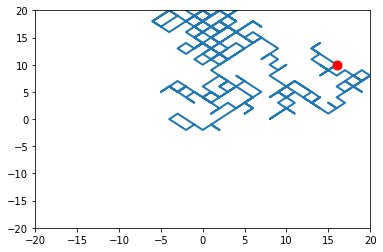

In [29]:
# Set number of steps for each random walk.
num_steps = 1000

# Create an empty figure of the desired size.
bound = 20
fig = plt.figure() 		# must have figure object for movie
ax = plt.axes(xlim=(-bound, bound), ylim=(-bound, bound))

# Create a line and a point with no data.  They will be updated during each
# frame of the animation.
(my_line,) = ax.plot([], [], lw=2)				# line to show path
(my_point,) = ax.plot([], [], 'ro', ms=9)		# dot to show current position

# Generate the random walk data.
x_steps = 2*(rand(num_steps) < 0.5) - 1		# generate random steps +/- 1
y_steps = 2*(rand(num_steps) < 0.5) - 1
x_coordinate = x_steps.cumsum()				# sum steps to get position
y_coordinate = y_steps.cumsum()

# This function will generate each frame of the animation.
# It adds all of the data through frame n to a line
# and moves a point to the nth position of the walk.
def get_step(n, x, y, this_line, this_point):
	this_line.set_data(x[:n+1], y[:n+1])
	this_point.set_data(x[n], y[n])

# let's make sure we can see the animation in the notebook
from IPython.display import HTML
mpl.rcParams['animation.html'] = 'html5'

# Call the animator and create the movie.
ani = animation.FuncAnimation(fig, get_step, frames=num_steps, \
					fargs=(x_coordinate,y_coordinate,my_line,my_point) )

HTML(ani.to_html5_video())

# Save the movie in the current directory.
# *** THIS WILL CAUSE AN ERROR UNLESS FFMPEG OR MENCODER IS INSTALLED. ***
#my_movie.save('random_walk.mp4', fps=30)